In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [140]:
F = open("./logResults/logFile_BidafHighway.txt","r") 
line = F.readlines()
# matched_pattern = []
# Thinking of doing some regex maybe?
trainIteration = []
trainF1 = []
trainEM = []
trainLoss = []

devIteration = []
devF1 = []
devEM = []
devLoss = []

trainIterLoss = []
trainLoss = []
trainSmoothLoss = []
trainGradNorm = []
trainParamNorm = []

for i in range(len(line)):
    textLine = line[i]
    textLine = textLine.strip()
#     print(textLine)
    if(textLine.startswith('Epoch')) and "dev loss: " not in textLine and "Train F1 score: " in textLine:
        array = re.split(', ',textLine)
        for j in range(len(array)):
            itemArray = re.split(" ", array[j])
            if(itemArray[0] == 'Iter'):
                trainIteration.append(int(itemArray[1]))
            if(itemArray[1] == 'F1'):
                trainF1.append(float(itemArray[3])*100)
            if(itemArray[1] == 'EM'):
                trainEM.append(float(itemArray[3])*100)
    if(textLine.startswith('Epoch')) and "dev loss: " not in textLine and "Dev F1 score: " in textLine:
        array = re.split(', ',textLine)
        for j in range(len(array)):
            itemArray = re.split(" ", array[j])
            if(itemArray[0] == 'Iter'):
                devIteration.append(int(itemArray[1]))
            if(itemArray[1] == 'F1'):
                devF1.append(float(itemArray[3])*100)
            if(itemArray[1] == 'EM'):
                devEM.append(float(itemArray[3])*100)
    if(textLine.startswith('Epoch') and "dev loss: " in textLine):
        array = re.split(", ", textLine)
        for i in range(len(array)):
            itemArray = re.split(" ", array[i])
            if(itemArray[0] == 'dev'):
                devLoss.append(float(itemArray[2]))
    if(textLine.startswith('epoch') and "smoothed loss" in textLine):
        array = re.split(", ", textLine)

        for j in range(len(array)):
            itemArray = re.split(" ", array[j])         
            if(itemArray[0] == 'iter'):
                trainIterLoss.append(int(itemArray[1]))
                iterVal = int(itemArray[1])
            if(itemArray[0] == 'loss'):
                trainLoss.append(float(itemArray[1]))
            if(itemArray[0] == 'smoothed'):
                trainSmoothLoss.append(float(itemArray[2]))
            if(itemArray[0] == 'grad'):
                trainGradNorm.append(float(itemArray[2]))
            if(itemArray[0] == 'param'):
                trainParamNorm.append(float(itemArray[2]))

### Plots for Training F1/EM Scores and Dev F1/EM Scores

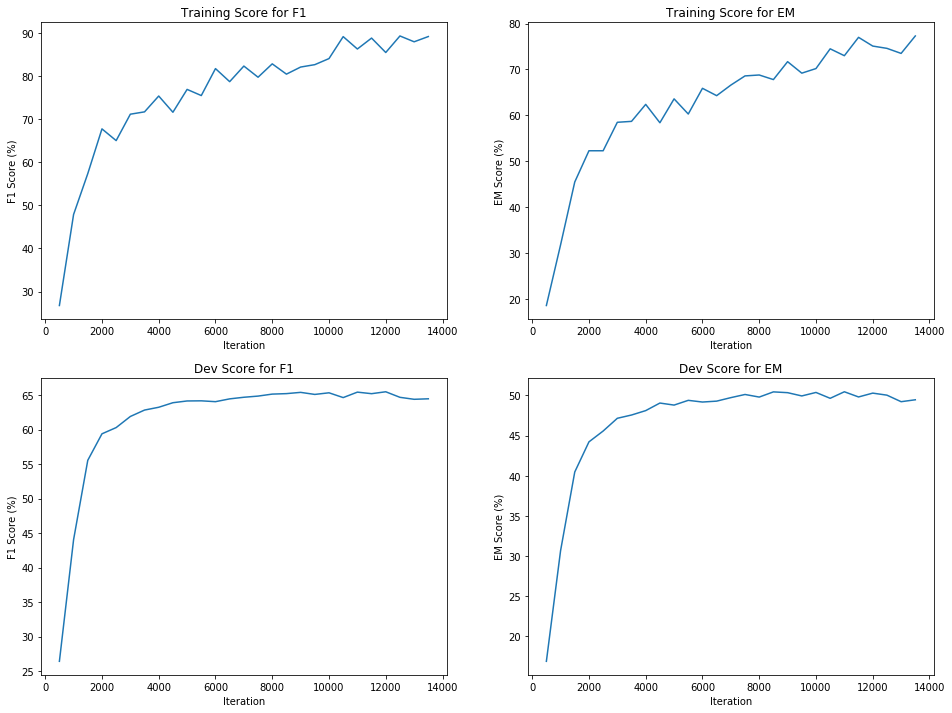

In [141]:
fig, ax1 = plt.subplots(figsize=(16,12))
plt.subplot(2,2,1)
plt.plot(trainIteration, trainF1)
plt.xlabel("Iteration")
plt.ylabel("F1 Score (%)")
plt.title("Training Score for F1")
plt.subplot(2,2,2)
plt.plot(trainIteration, trainEM)
plt.xlabel("Iteration")
plt.ylabel("EM Score (%)")
plt.title("Training Score for EM")
plt.subplot(2,2,3)
plt.plot(devIteration, devF1)
plt.xlabel("Iteration")
plt.ylabel("F1 Score (%)")
plt.title("Dev Score for F1")
plt.subplot(2,2,4)
plt.plot(devIteration, devEM)
plt.xlabel("Iteration")
plt.ylabel("EM Score (%)")
plt.title("Dev Score for EM")
plt.show()

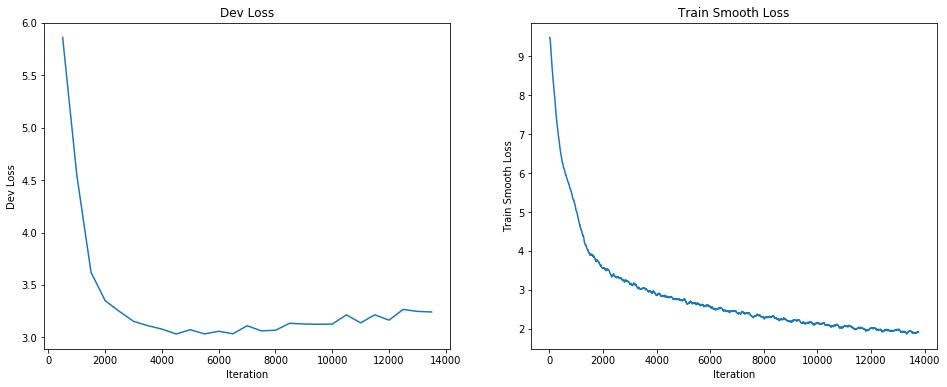

In [142]:
fig, ax1 = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(devIteration, devLoss)
plt.xlabel("Iteration")
plt.ylabel("Dev Loss")
plt.title("Dev Loss")
plt.subplot(1,2,2)
plt.plot(trainIterLoss, trainSmoothLoss)
plt.xlabel("Iteration")
plt.ylabel("Train Smooth Loss")
plt.title("Train Smooth Loss")
plt.show()

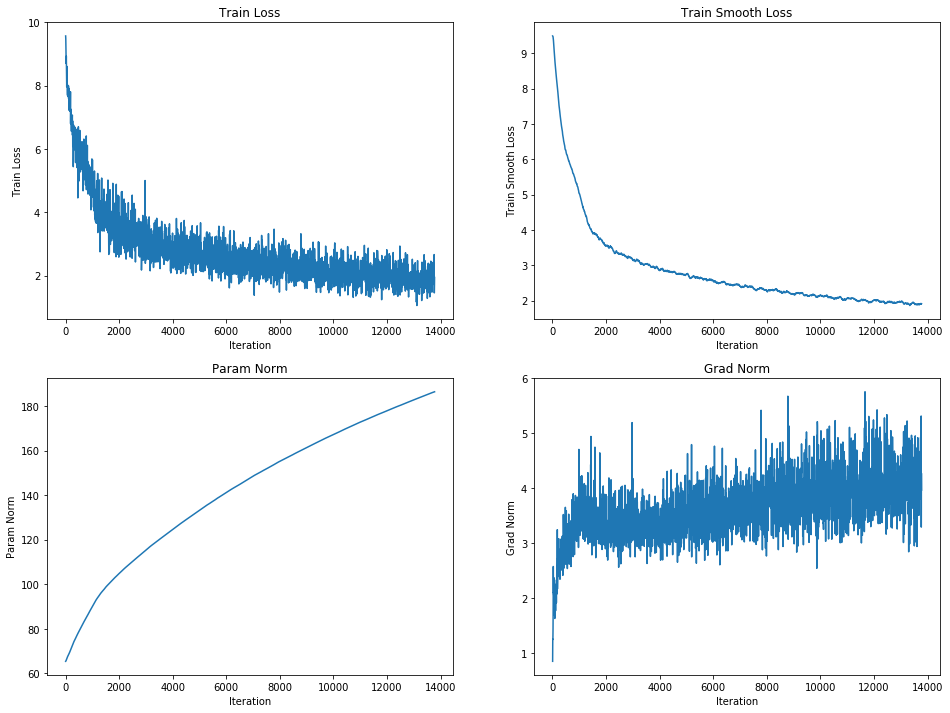

In [143]:
fig, ax1 = plt.subplots(figsize=(16,12))
plt.subplot(2,2,1)
plt.plot(trainIterLoss, trainLoss)
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.title("Train Loss")
plt.subplot(2,2,2)
plt.plot(trainIterLoss, trainSmoothLoss)
plt.xlabel("Iteration")
plt.ylabel("Train Smooth Loss")
plt.title("Train Smooth Loss")
plt.subplot(2,2,3)
plt.plot(trainIterLoss, trainParamNorm)
plt.xlabel("Iteration")
plt.ylabel("Param Norm")
plt.title("Param Norm")
plt.subplot(2,2,4)
plt.plot(trainIterLoss, trainGradNorm)
plt.xlabel("Iteration")
plt.ylabel("Grad Norm")
plt.title("Grad Norm")
plt.show()